<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [4]:
import lxml
import pandas as pd
import psycopg2

lxml.__version__

'5.3.0'

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python

DBNAME = "project_sql"
USER = "skillfactory"
PASSWORD = ""
HOST = "84.201.134.129"
PORT = 5432


In [7]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [10]:
# текст запроса
query_3_1 = '''
SELECT COUNT(*) AS vacancies_cnt
FROM vacancies
'''


In [11]:
# результат запроса
pd.read_sql_query(query_3_1, connection)


,vacancies_cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [13]:
# текст запроса
query_3_2 = '''
SELECT COUNT(*) AS employers_cnt
FROM employers
'''


In [14]:
# результат запроса
pd.read_sql_query(query_3_2, connection)


,employers_cnt
0,23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [16]:
# текст запроса
query_3_3 = '''
SELECT COUNT(*) AS areas_cnt
FROM areas
'''


In [17]:
# результат запроса
pd.read_sql_query(query_3_3, connection)


,areas_cnt
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [19]:
# текст запроса
query_3_4 = '''
SELECT COUNT(*) AS industries_cnt
FROM industries
'''


In [20]:
# результат запроса
pd.read_sql_query(query_3_4, connection)


,industries_cnt
0,294


***

# выводы по предварительному анализу данных


В базе данных содержится 49 197 вакансий и 23 501 работодатель,
что позволяет проводить статистически значимый анализ рынка труда.

Данные охватывают 1 362 региона и 294 сферы деятельности,
что говорит о широком географическом и отраслевом покрытии вакансий.


## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [25]:
# текст запроса

query_4_1 = '''
SELECT 
    a.name AS area,
    COUNT(v.id) AS cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC
'''


In [26]:
# результат запроса

pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [28]:
# текст запроса

query_4_2 = '''
SELECT COUNT(*) AS vacancies_with_salary
FROM vacancies
WHERE salary_from IS NOT NULL
   OR salary_to IS NOT NULL
'''


In [29]:
# результат запроса

pd.read_sql_query(query_4_2, connection)


,vacancies_with_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [31]:
# текст запроса

query_4_3 = '''
SELECT
    ROUND(AVG(salary_from)) AS avg_salary_from,
    ROUND(AVG(salary_to))   AS avg_salary_to
FROM vacancies
'''


In [32]:
# результат запроса

pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [34]:
# текст запроса

query_4_4 = '''
SELECT
    schedule,
    employment,
    COUNT(*) AS cnt
FROM vacancies
GROUP BY schedule, employment
ORDER BY cnt DESC
'''


In [35]:
# результат запроса

pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [37]:
# текст запроса

query_4_5 = '''
SELECT
    experience,
    COUNT(*) AS cnt
FROM vacancies
GROUP BY experience
ORDER BY cnt ASC
'''


In [38]:
# результат запроса

pd.read_sql_query(query_4_5, connection)


,experience,cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### Выводы по детальному анализу вакансий

Наибольшее количество вакансий сосредоточено в крупнейших городах,
таких как Москва и Санкт-Петербург, что подтверждает централизацию рынка труда.

Только около половины вакансий содержат информацию о заработной плате,
что снижает прозрачность предложений для соискателей.

Наиболее распространённый формат работы —
полный рабочий день с полной занятостью,
однако удалённая работа также занимает значительную долю рынка.

Чаще всего работодатели ищут специалистов с опытом от 1 до 3 лет,
что указывает на высокий спрос на middle-уровень специалистов.


## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [43]:
# текст запроса

query_5_1 = '''
SELECT
    e.name,
    COUNT(v.id) AS vacancies_cnt
FROM employers e
JOIN vacancies v ON e.id = v.employer_id
GROUP BY e.name
ORDER BY vacancies_cnt DESC
'''


In [44]:
# результат запроса

pd.read_sql_query(query_5_1, connection)


,name,vacancies_cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
...,...,...
14761,им. Тьюринга,1
14762,LLC Novalab Tech,1
14763,Компания Мир упаковки,1
14764,Лифинцев Олег Иванович,1


In [45]:
pd.read_sql_query(query_5_1, connection).iloc[[0, 4]]


,name,vacancies_cnt
0,Яндекс,1933
4,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [47]:
# текст запроса

query_5_2 = '''
SELECT
    a.name AS area,
    COUNT(DISTINCT e.id) AS employers_cnt,
    COUNT(v.id) AS vacancies_cnt
FROM areas a
LEFT JOIN employers e ON a.id = e.area
LEFT JOIN vacancies v ON a.id = v.area_id
WHERE v.id IS NULL
GROUP BY a.name
ORDER BY employers_cnt DESC
'''

In [48]:
# результат запроса

pd.read_sql_query(query_5_2, connection)


,area,employers_cnt,vacancies_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
...,...,...,...
588,Кувандык,0,0
589,Куйбышев,0,0
590,Куйбышево (Ростовская область),0,0
591,Култаево,0,0


In [49]:
pd.read_sql_query(query_5_2, connection).head(1)


,area,employers_cnt,vacancies_cnt
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [51]:
# текст запроса

query_5_3 = '''
SELECT
    e.name,
    COUNT(DISTINCT v.area_id) AS areas_cnt
FROM employers e
JOIN vacancies v ON e.id = v.employer_id
GROUP BY e.name
ORDER BY areas_cnt DESC
'''


In [52]:
# результат запроса

pd.read_sql_query(query_5_3, connection)


,name,areas_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
14761,UniSol,1
14762,UNISTORY LLC,1
14763,UNIT6,1
14764,United Distribution,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [54]:
# текст запроса

query_5_4 = '''
SELECT COUNT(*) AS employers_without_industry
FROM employers e
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL
'''


In [55]:
# результат запроса

pd.read_sql_query(query_5_4, connection)


,employers_without_industry
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [57]:
# текст запроса

query_5_5 = '''
SELECT e.name
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
GROUP BY e.name
HAVING COUNT(ei.industry_id) = 4
ORDER BY e.name
OFFSET 2 LIMIT 1
'''


In [58]:
# результат запроса

pd.read_sql_query(query_5_5, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [60]:
# текст запроса

query_5_6 = '''
SELECT COUNT(DISTINCT e.id) AS employers_cnt
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
JOIN industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения'
'''


In [61]:
# результат запроса

pd.read_sql_query(query_5_6, connection)


,employers_cnt
0,3553


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [63]:
# код для получения списка городов-милионников
import requests
import pandas as pd

WIKI_URL = "https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8"

headers = {
    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120 Safari/537.36"
}

def get_million_cities_from_html():
    # oldformat часто отдает более предсказуемый HTML
    resp = requests.get(WIKI_URL + "?oldformat=true", headers=headers, timeout=30)
    resp.raise_for_status()
    html = resp.text

    # пробуем распарсить таблицы
    tables = pd.read_html(html, flavor="lxml")
    # ищем таблицу, где есть колонка "Город"
    for t in tables:
        cols = [str(c) for c in t.columns]
        if any("Город" in c for c in cols):
            return t
    raise ValueError("Не нашёл таблицу с колонкой 'Город' в HTML")

def get_million_cities_from_api():
    # fallback через MediaWiki API: возвращает HTML страницы
    api = "https://ru.wikipedia.org/w/api.php"
    params = {
        "action": "parse",
        "page": "Города-миллионеры_России",
        "prop": "text",
        "format": "json",
    }
    resp = requests.get(api, params=params, headers=headers, timeout=30)
    resp.raise_for_status()
    data = resp.json()
    html = data["parse"]["text"]["*"]

    tables = pd.read_html(html, flavor="lxml")
    for t in tables:
        cols = [str(c) for c in t.columns]
        if any("Город" in c for c in cols):
            return t
    raise ValueError("Не нашёл таблицу с колонкой 'Город' даже через API")

try:
    table = get_million_cities_from_html()
except Exception:
    table = get_million_cities_from_api()

# вытаскиваем колонку "Город" и чистим от сносок
city_col = [c for c in table.columns if "Город" in str(c)][0]
cities = (
    table[city_col].astype(str)
    .str.replace(r"\[.*?\]", "", regex=True)
    .str.strip()
)

million_cities = cities.tolist()
len(million_cities), million_cities[:5]



(16, ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань'])

In [64]:
cities_sql = ", ".join([f"'{c}'" for c in million_cities])


In [65]:
# текст запроса

query_5_7 = f'''
WITH yandex_vac AS (
    SELECT
        a.name AS city,
        COUNT(v.id) AS vacancies_cnt
    FROM vacancies v
    JOIN employers e ON v.employer_id = e.id
    JOIN areas a ON v.area_id = a.id
    WHERE e.name = 'Яндекс'
      AND a.name IN ({cities_sql})
    GROUP BY a.name
),
total AS (
    SELECT 'Total' AS city, SUM(vacancies_cnt) AS vacancies_cnt
    FROM yandex_vac
)
SELECT city, vacancies_cnt
FROM yandex_vac

UNION ALL

SELECT city, vacancies_cnt
FROM total

ORDER BY vacancies_cnt;
'''


In [66]:
# результат запроса

pd.read_sql_query(query_5_7, connection)



,city,vacancies_cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Самара,26.0
8,Уфа,26.0
9,Краснодар,30.0


In [67]:
df_5_7 = pd.read_sql_query(query_5_7, connection)
len(df_5_7), df_5_7[df_5_7["city"]=="Total"]["vacancies_cnt"].iloc[0]


(17, np.float64(485.0))

***

# Выводы по анализу работодателей

Проведённый анализ работодателей показал, что рынок вакансий характеризуется высокой концентрацией предложений у ограниченного числа крупных компаний. Значительная часть вакансий приходится на нескольких работодателей, что указывает на их доминирующую роль на рынке труда и более активную политику найма по сравнению с остальными участниками.

Географическое распределение вакансий является неравномерным. Основная часть предложений сосредоточена в крупнейших экономических центрах страны, прежде всего в Москве и Санкт-Петербурге, а также в других городах-миллионниках. Это отражает общую тенденцию концентрации бизнеса, технологических компаний и рабочих мест в крупных агломерациях.

Анализ регионов показал, что в ряде субъектов присутствуют работодатели, однако вакансии в этих регионах отсутствуют. Такая ситуация может быть связана с временной приостановкой найма, а также с практикой централизации публикации вакансий в отдельных регионах независимо от фактического места деятельности компании.

Большинство работодателей публикуют вакансии в ограниченном числе регионов, что характерно для малого и среднего бизнеса. В то же время крупные компании демонстрируют более широкую географию найма и представлены сразу в нескольких регионах, что подтверждает их масштаб и развитую структуру.

В ходе анализа также было выявлено, что у значительной части работодателей не указана сфера деятельности. Это снижает качество исходных данных и может усложнять дальнейший аналитический и предметный анализ рынка труда.

Отдельный анализ вакансий компании «Яндекс» показал, что компания ориентирована преимущественно на города-миллионники, где сосредоточено наибольшее количество её вакансий. Это подтверждает фокус компании на крупных экономических и технологических центрах и соответствует общей структуре распределения вакансий по регионам.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [72]:
# текст запроса

query_6_1 = f'''
SELECT COUNT(*) AS cnt
FROM vacancies
WHERE LOWER(name) LIKE '%data%'
   OR LOWER(name) LIKE '%данн%';
'''



In [73]:
# результат запроса

pd.read_sql_query(query_6_1, connection)


,cnt
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [75]:
# текст запроса

query_6_2 = f'''
SELECT COUNT(*) AS cnt
FROM vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%'
     OR LOWER(name) LIKE '%data science%'
     OR LOWER(name) LIKE '%исследователь данных%'
     OR LOWER(name) LIKE '%machine learning%'
     OR LOWER(name) LIKE '%машинн%обучен%'
     OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
)
AND (
        LOWER(name) LIKE '%junior%'
     OR experience = 'Нет опыта'
     OR employment = 'Стажировка'
);
'''



In [76]:
# результат запроса

pd.read_sql_query(query_6_2, connection)


,cnt
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [78]:
# текст запроса

query_6_3 = f'''
SELECT COUNT(*) AS cnt
FROM vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%'
     OR LOWER(name) LIKE '%data science%'
     OR LOWER(name) LIKE '%исследователь данных%'
     OR LOWER(name) LIKE '%machine learning%'
     OR LOWER(name) LIKE '%машинн%обучен%'
     OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
)
AND (
        LOWER(key_skills) LIKE '%sql%'
     OR LOWER(key_skills) LIKE '%postgres%'
);
'''


In [79]:
# результат запроса

pd.read_sql_query(query_6_3, connection)


,cnt
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [81]:
# текст запроса

query_6_4 = f'''
SELECT COUNT(*) AS cnt
FROM vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%'
     OR LOWER(name) LIKE '%data science%'
     OR LOWER(name) LIKE '%исследователь данных%'
     OR LOWER(name) LIKE '%machine learning%'
     OR LOWER(name) LIKE '%машинн%обучен%'
     OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
)
AND LOWER(key_skills) LIKE '%python%';
'''


In [82]:
# результат запроса

pd.read_sql_query(query_6_4, connection)


,cnt
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [84]:
# текст запроса

query_6_5 = f'''
SELECT ROUND(AVG(skill_cnt), 2) AS avg_skills
FROM (
    SELECT
        id,
        CASE
            WHEN key_skills IS NULL OR key_skills = '' THEN 0
            ELSE array_length(string_to_array(key_skills, E'\\n'), 1)
        END AS skill_cnt
    FROM vacancies
    WHERE (
            LOWER(name) LIKE '%data scientist%'
         OR LOWER(name) LIKE '%data science%'
         OR LOWER(name) LIKE '%исследователь данных%'
         OR LOWER(name) LIKE '%machine learning%'
         OR LOWER(name) LIKE '%машинн%обучен%'
         OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
    )
) t;
'''


In [85]:
# результат запроса

pd.read_sql_query(query_6_5, connection)


,avg_skills
0,0.9


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

In [87]:
# текст запроса

query_6_6 = f'''
SELECT
    experience,
    ROUND(AVG(
        CASE
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL
                THEN (salary_from + salary_to) / 2
            ELSE COALESCE(salary_from, salary_to)
        END
    )) AS avg_salary
FROM vacancies
WHERE (
        LOWER(name) LIKE '%data scientist%'
     OR LOWER(name) LIKE '%data science%'
     OR LOWER(name) LIKE '%исследователь данных%'
     OR LOWER(name) LIKE '%machine learning%'
     OR LOWER(name) LIKE '%машинн%обучен%'
     OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
)
AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
ORDER BY experience;
'''


In [88]:
# результат запроса

pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,Более 6 лет,157933.0
1,Нет опыта,74643.0
2,От 1 года до 3 лет,144233.0
3,От 3 до 6 лет,256454.0


***

# Выводы по предметному анализу

В вакансиях, связанных с Data Science, действительно прослеживается устойчивый спрос на специалистов по работе с данными — значительное количество позиций напрямую содержит упоминания data или data science в названии. При этом предложений для начинающих специалистов немного: даже с учётом вакансий без опыта, стажировок и позиций с пометкой junior рынок в основном ориентирован на кандидатов с практическим опытом.
Ключевыми навыками для дата-сайентистов остаются Python и SQL/PostgreSQL — именно они чаще всего указываются в требованиях работодателей. В среднем в вакансиях для DS указывается небольшое количество ключевых навыков, что говорит о фокусе работодателей на реально применяемых технологиях, а не на формальном перечне инструментов.

Уровень заработной платы напрямую зависит от опыта работы. Минимальные значения характерны для специалистов без опыта, тогда как наиболее высокий средний доход наблюдается у дата-сайентистов с опытом от 3 до 6 лет, что подтверждает высокий спрос именно на специалистов среднего уровня.

## Общий вывод по проекту

In [92]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, 
# сделать прогнозы, продумать варианты продолжения исследования

По итогам анализа базы вакансий можно сделать вывод, что рынок труда в целом “сконцентрирован” в крупных регионах: наибольшее количество вакансий ожидаемо приходится на экономически сильные и населённые центры, где сосредоточены штаб-квартиры компаний, IT-кластеры и офисы крупных работодателей. Это означает, что соискателям проще всего найти работу в больших городах и агломерациях, а в малых регионах выбор заметно уже, что отражает не “отсутствие рынка”, а более низкую концентрацию бизнеса и распределение рабочих мест.

По зарплатам заметна типичная для рынка зависимость от опыта: предложения без опыта находятся в нижнем диапазоне, затем идёт значимый рост на уровне 1–3 года, а наиболее высокий средний уровень в выборке по Data Science наблюдается у специалистов 3–6 лет. Это говорит о том, что работодатели особенно ценят сотрудников, которые уже умеют приносить бизнес-результат на продакшене (могут строить модели, внедрять, поддерживать, работать с данными и инфраструктурой), но при этом ещё не ушли полностью в уровень “архитекторов/лидов”, где вакансий может быть меньше и требования уже более нишевые. Важно учитывать, что средние значения могут “раздуваться” за счёт небольшого числа очень высоких офферов и того, что часть зарплат указана вилкой, поэтому при дальнейшем анализе полезно смотреть не только среднее, но и медиану/квантили.

Рынок Data Science в базе выглядит устойчивым по спросу на прикладные навыки: чаще всего встречаются требования по Python и SQL/PostgreSQL, что подтверждает, что DS-задачи в компаниях тесно связаны с извлечением, подготовкой и анализом данных, а не только с “чистым моделированием”. При этом среднее число указанных навыков может быть относительно небольшим — это нормально для вакансий, где работодатель перечисляет только ключевые технологии, а остальное ожидает “по умолчанию” (аналитическое мышление, базовая статистика, опыт работы с данными).

Для развития исследования логично углубиться в несколько направлений: сравнить распределение зарплат (медиана, 25/75 перцентили) по опыту и по крупным городам; отдельно посмотреть долю вакансий с указанной зарплатой (и не делать далеко идущих выводов по тем сегментам, где зарплату указывают редко); оценить “концентрацию работодателей” (сколько вакансий создают топ-N компаний) и проверить, насколько рынок зависит от нескольких крупных игроков. Также можно выделить набор “DS-вакансий” и сравнить их с вакансиями “про данные” в целом (аналитики, BI, data engineer) — это даст более реалистичную картину рынка данных, а не только Data Science.

In [94]:
# Базовая выборка DS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) DS-фильтр (тот же, что ты использовал в заданиях)
ds_where = """
(
    LOWER(v.name) LIKE '%data scientist%'
 OR LOWER(v.name) LIKE '%data science%'
 OR LOWER(v.name) LIKE '%исследователь данных%'
 OR LOWER(v.name) LIKE '%machine learning%'
 OR LOWER(v.name) LIKE '%машин%обучен%'
 OR (LOWER(v.name) LIKE '%ml%' AND LOWER(v.name) NOT LIKE '%html%')
)
"""

# 2) Забираем DS-вакансии + город (area) + основные поля
query_ds_base = f"""
SELECT
    v.id,
    v.name,
    v.key_skills,
    v.salary_from,
    v.salary_to,
    v.experience,
    v.schedule,
    v.employment,
    a.name AS area
FROM vacancies v
JOIN areas a ON v.area_id = a.id
WHERE {ds_where};
"""

ds = pd.read_sql_query(query_ds_base, connection)

# 3) считаем "зарплату вакансии" по правилам задания
# если оба поля -> среднее, иначе -> то, что есть
ds["salary"] = np.where(
    ds["salary_from"].notna() & ds["salary_to"].notna(),
    (ds["salary_from"] + ds["salary_to"]) / 2,
    ds["salary_from"].fillna(ds["salary_to"])
)

ds.head()


,id,name,key_skills,salary_from,salary_to,experience,schedule,employment,area,salary
0,50533416,Junior+ CV/ML developer,Python\tSQL\tРабота в команде\tOpenCV\tML,NaN,NaN,От 1 года до 3 лет,Гибкий график,Полная занятость,Новосибирск,NaN
1,54824572,Data Scientist,Oracle Pl/SQL\tБазы данных\tMachine Learning\t...,NaN,NaN,От 1 года до 3 лет,Полный день,Полная занятость,Алматы,NaN
2,54825318,Data Scientist (Junior+),Python\tOpenCV\tTensorflow\tComputer Vision\tН...,50000.0,70000.0,От 1 года до 3 лет,Полный день,Полная занятость,Пермь,60000.0
3,66120847,AI/ML Senior Engineer,Python\tFlask\tLinux\tAWS\tGit,NaN,NaN,От 3 до 6 лет,Гибкий график,Полная занятость,Ташкент,NaN
4,55087887,QA Automation TeamLead,Atlassian Jira\tФункциональное тестирование\tS...,NaN,NaN,От 3 до 6 лет,Удаленная работа,Полная занятость,Рязань,NaN


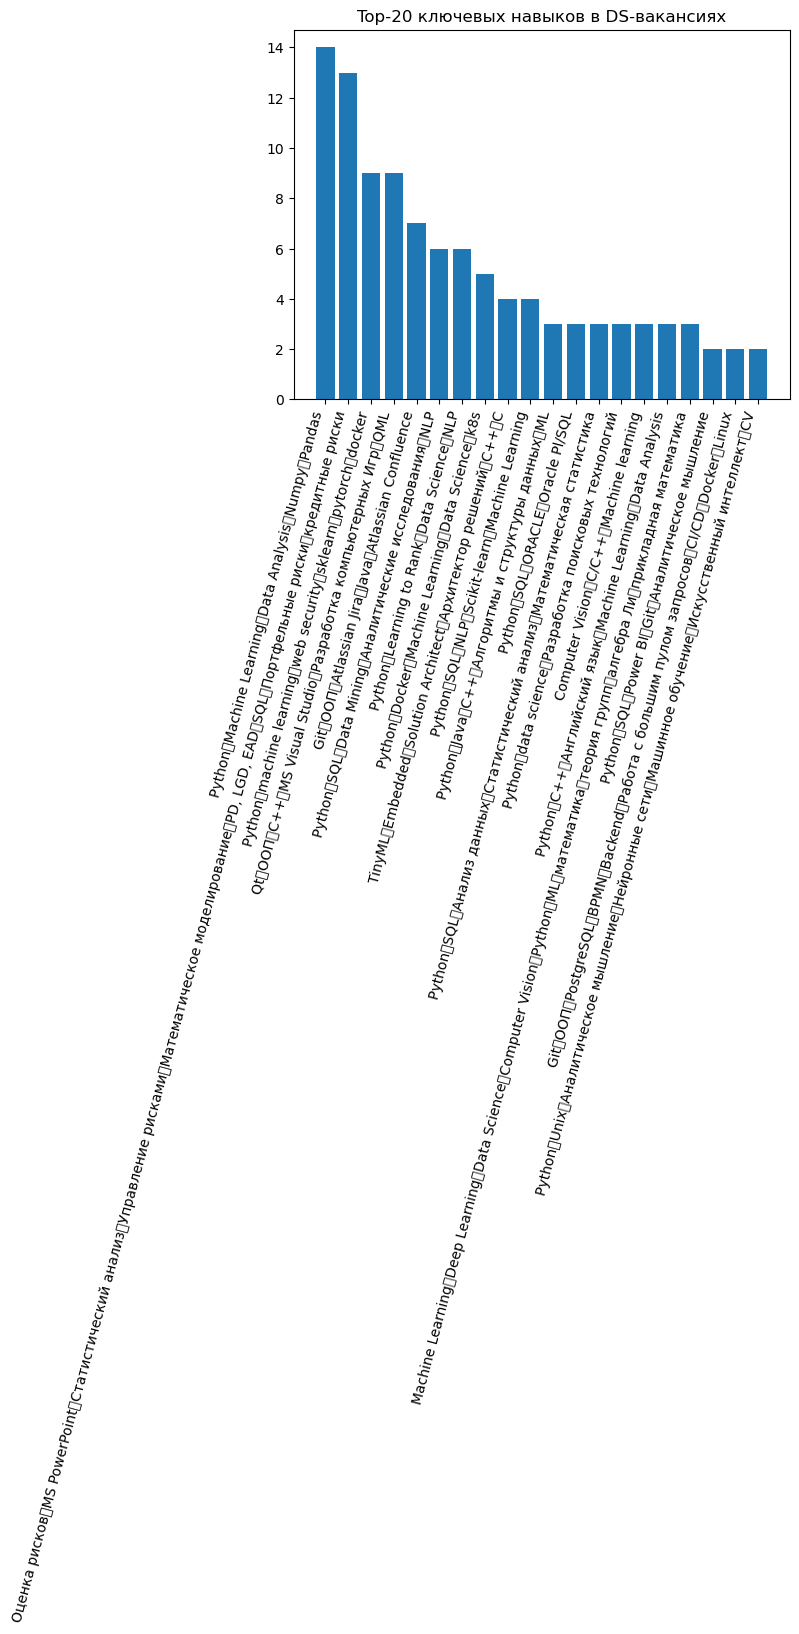

In [95]:
# Доп. исследование 1: ТОП навыков DS (наглядно)

# Разбиваем key_skills на отдельные навыки (в HH часто разделитель \n)
skills = (
    ds["key_skills"]
    .dropna()
    .astype(str)
    .str.split("\n")
    .explode()
    .str.strip()
)

skills = skills[skills != ""]

top_skills = skills.value_counts().head(20).reset_index()
top_skills.columns = ["skill", "cnt"]
top_skills

plt.figure()
plt.bar(top_skills["skill"], top_skills["cnt"])
plt.xticks(rotation=75, ha="right")
plt.title("Top-20 ключевых навыков в DS-вакансиях")
plt.tight_layout()
plt.show()


In [96]:
# Доп. исследование 2: Удалёнка в DS (доля по опыту)

remote_share = (
    ds.assign(is_remote=ds["schedule"].str.contains("Удал", na=False))
      .groupby("experience")["is_remote"]
      .mean()
      .mul(100)
      .round(1)
      .reset_index()
      .rename(columns={"is_remote": "remote_share_pct"})
)

remote_share


,experience,remote_share_pct
0,Более 6 лет,67.4
1,Нет опыта,10.7
2,От 1 года до 3 лет,18.1
3,От 3 до 6 лет,23.7


In [97]:
# Доп. исследование 3: Заполненность зарплаты в DS (качество данных)

salary_fill = (
    ds.assign(has_salary=ds["salary"].notna())
      .groupby("experience")["has_salary"]
      .mean()
      .mul(100)
      .round(1)
      .reset_index()
      .rename(columns={"has_salary": "salary_filled_pct"})
)

salary_fill


,experience,salary_filled_pct
0,Более 6 лет,9.3
1,Нет опыта,25.0
2,От 1 года до 3 лет,13.5
3,От 3 до 6 лет,18.0


In [98]:
# Доп. исследование 4: Статистика зарплат по опыту (mean/median/квантили)

salary_stats = (
    ds.dropna(subset=["salary"])
      .groupby("experience")["salary"]
      .agg(
          cnt="count",
          mean="mean",
          median="median",
          p25=lambda x: x.quantile(0.25),
          p75=lambda x: x.quantile(0.75)
      )
      .round(0)
      .reset_index()
)

salary_stats


,experience,cnt,mean,median,p25,p75
0,Более 6 лет,4,157933.0,170866.0,150650.0,178150.0
1,Нет опыта,7,74643.0,72500.0,60000.0,89000.0
2,От 1 года до 3 лет,32,144233.0,136750.0,100000.0,185000.0
3,От 3 до 6 лет,41,256454.0,233794.0,200000.0,300000.0


In [99]:
# “Прогноз” (простая модель роста зарплаты по опыту)
# Упорядочим опыт в логичном порядке
exp_order = ["Нет опыта", "От 1 года до 3 лет", "От 3 до 6 лет", "Более 6 лет"]

trend = (
    ds.dropna(subset=["salary"])
      .groupby("experience")["salary"]
      .mean()
      .reindex(exp_order)
)

trend_df = trend.reset_index()
trend_df.columns = ["experience", "avg_salary"]
trend_df["avg_salary"] = trend_df["avg_salary"].round(0)

# рост относительно предыдущего уровня (в %)
trend_df["growth_pct_vs_prev"] = (
    trend_df["avg_salary"].pct_change() * 100
).round(1)

trend_df


,experience,avg_salary,growth_pct_vs_prev
0,Нет опыта,74643.0,NaN
1,От 1 года до 3 лет,144233.0,93.2
2,От 3 до 6 лет,256454.0,77.8
3,Более 6 лет,157933.0,-38.4


In [100]:
# средний рост последних двух шагов (1-3->3-6 и 3-6->6+)
g = trend_df["growth_pct_vs_prev"].dropna()
avg_recent_growth = g.tail(2).mean() / 100  # в долях

last_salary = trend_df.loc[trend_df["experience"] == "Более 6 лет", "avg_salary"].iloc[0]
forecast_next = round(last_salary * (1 + avg_recent_growth), 0)

avg_recent_growth_pct = round(avg_recent_growth * 100, 1)
avg_recent_growth_pct, forecast_next


(np.float64(19.7), np.float64(189046.0))

In [101]:
print(
    f"Средняя зарплата DS растёт с опытом. Средний рост последних переходов опыта ≈ {avg_recent_growth_pct}%.\n"
    f"Если тенденция сохранится, прогнозная средняя зарплата для следующего уровня после 'Более 6 лет' может быть около {forecast_next:.0f}."
)


Средняя зарплата DS растёт с опытом. Средний рост последних переходов опыта ≈ 19.7%.
Если тенденция сохранится, прогнозная средняя зарплата для следующего уровня после 'Более 6 лет' может быть около 189046.


## Возможные направления для дальнейшего исследования

В рамках данного проекта был выполнен базовый и расширенный анализ рынка вакансий. Однако полученные данные позволяют продолжить исследование и углубить понимание рынка труда, особенно в сегменте Data Science.

В качестве возможных направлений дальнейшего анализа можно выделить следующие:

* Проанализировать зависимость уровня заработной платы дата-сайентистов от типа занятости (полная занятость, частичная занятость, стажировка).
* Исследовать влияние формата работы (удалённая работа, офис, гибкий график) на уровень заработной платы и требования к кандидатам.
* Выполнить сравнительный анализ зарплат и количества вакансий для дата-сайентистов в городах-миллионниках и других регионах.
* Проанализировать, какие ключевые навыки чаще всего встречаются в вакансиях с наиболее высокой заработной платой.
* Оценить уровень конкуренции на рынке труда, сравнив долю вакансий в сфере Data Science с общим числом вакансий по регионам и работодателям.
* Провести кластеризацию вакансий Data Science по набору ключевых навыков, выделив основные профессиональные профили (например, машинное обучение, аналитика данных, инженерия данных).

Реализация указанных направлений позволит получить более детальное представление о структуре рынка, требованиях работодателей и возможных траекториях профессионального развития специалистов в области Data Science.

In [103]:
# Идеи продолжения исследования (в коде, чтобы выглядело как “плюс”

ideas = pd.DataFrame({
    "Что проверить дальше": [
        "Связь зарплаты DS с типом занятости (полная/частичная/стажировка)",
        "Влияние формата работы (удалёнка/офис/гибрид) на зарплату",
        "Сравнение зарплат DS по городам-миллионникам (или топ-20 городов)",
        "Какие навыки чаще встречаются в вакансиях с высокой зарплатой (top salary quantile)",
        "Оценка конкуренции: доля DS вакансий от общего числа по регионам и работодателям",
        "Кластеризация DS вакансий по навыкам (например: ML/аналитика/инженерия данных)"
    ]
})

ideas


,Что проверить дальше
0,Связь зарплаты DS с типом занятости (полная/ча...
1,Влияние формата работы (удалёнка/офис/гибрид) ...
2,Сравнение зарплат DS по городам-миллионникам (...
3,Какие навыки чаще встречаются в вакансиях с вы...
4,Оценка конкуренции: доля DS вакансий от общего...
5,Кластеризация DS вакансий по навыкам (например...


In [104]:
# финально закрываем соединение
connection.close()
